# 3.1 인공신경망의 구성요소
## 3.1.1 스칼라, 벡터, 행렬, 텐서

In [2]:
import numpy as np

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
print(x.shape)
print(x.ndim)
print(x.dtype)
print(x)

(12,)
1
int32
[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [3]:
A = x.reshape((3, 4)) #c-like
print(A.shape)
print(A.ndim)
print(A.dtype)
print(A)

(3, 4)
2
int32
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [4]:
A = x.reshape((3, 4), order='F') #Fortran-like index ordering
print(A.shape)
print(A.ndim)
print(A.dtype)
print(A)

(3, 4)
2
int32
[[ 1  4  7 10]
 [ 2  5  8 11]
 [ 3  6  9 12]]


In [5]:
A = x.reshape((3, 2, 2))
print(A.shape)
print(A.ndim)
print(A.dtype)
print(A)

(3, 2, 2)
3
int32
[[[ 1  2]
  [ 3  4]]

 [[ 5  6]
  [ 7  8]]

 [[ 9 10]
  [11 12]]]


## 3.1.2 Keras 함수형 API

In [4]:
from keras.layers import Input, Dense
from keras.models import Model

inputs = Input(shape=(512,))
# output = Layer(parameter)(input)
# Dense(units, activation)
x1 = Dense(64, activation='relu')(inputs)
x2 = Dense(64, activation='relu')(x1)
outputs = Dense(10, activation='softmax')(x2)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(data, labels)

Using TensorFlow backend.


NameError: name 'data' is not defined

## 3.1.5 모델과 손실함수

In [ ]:
inputs = Input(shape=(3,))
fc1 = Dense(4, activation='relu')(inputs)
outputs = Dense(1, activation='softmax')(fc1)
model = Model(inputs, outputs)

# 3.2 범죄율로 집값 예측하기(basic regression)
## 3.2.1 dataset 살펴보기

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.layers import Input, Dense
from keras.models import Model
from keras import metrics

%config InlineBackend.figure_format = 'retina'

In [11]:
from keras.datasets import boston_housing
(x_train, y_train),(x_test, y_test)=boston_housing.load_data()
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [12]:
train_df = pd.DataFrame(data=x_train, columns=cols)
test_df = pd.DataFrame(data=x_test, columns=cols)

In [13]:
train_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [8]:
train_df.shape

(404, 13)

In [9]:
x_train_crim = x_train[:, 0]
x_test_crim = x_test[:, 0]

In [10]:
x_train_crim = train_df['CRIM'].values
x_test_crim = test_df['CRIM'].values

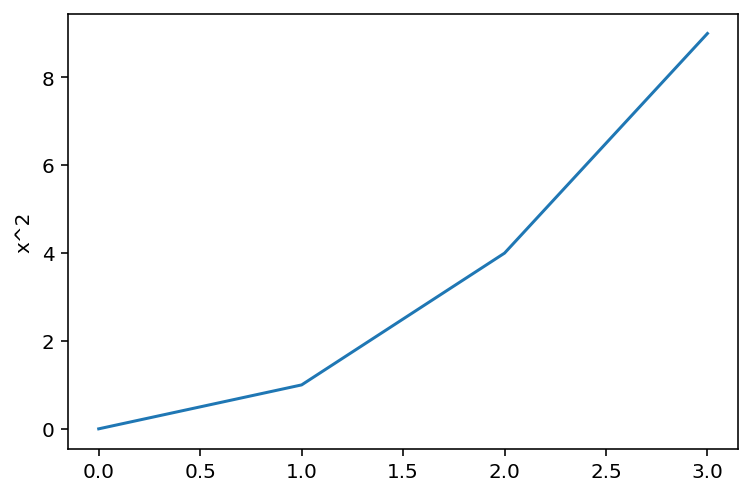

In [11]:
plt.plot([0, 1, 2, 3], [0, 1, 4, 9])
plt.ylabel('x^2')
plt.show()

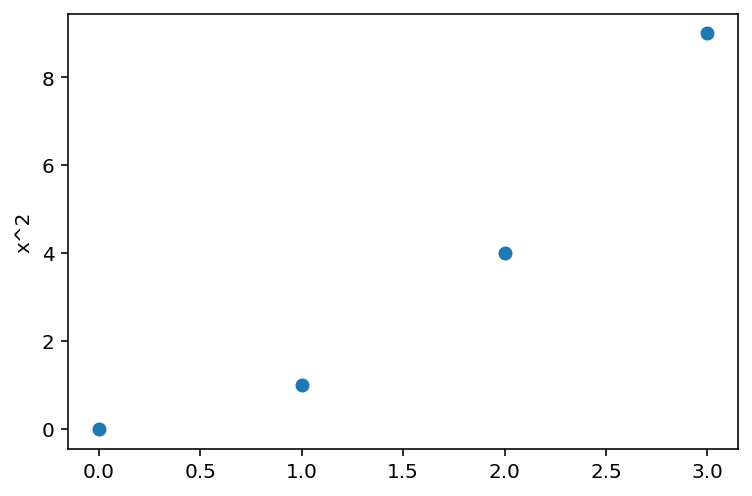

In [12]:
x = np.array([0, 1, 2, 3])
y = x**2
plt.plot(x, y, 'o')
plt.ylabel('x^2')
plt.show()

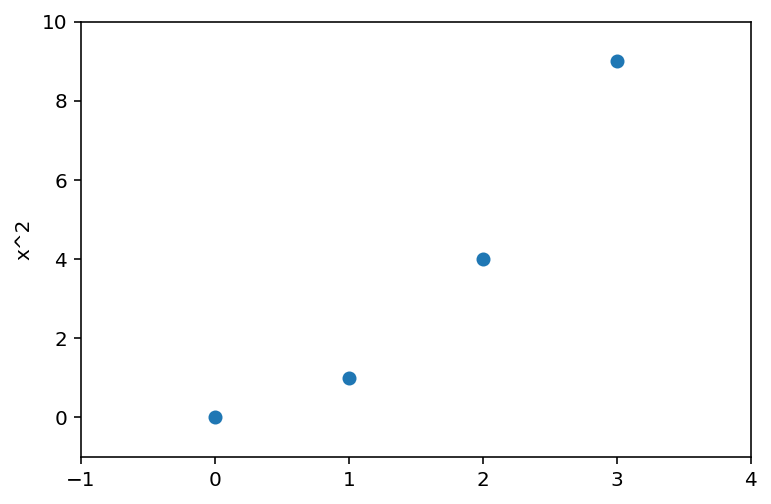

In [13]:
# axis [x start, x end, y start, y end]
plt.plot([0, 1, 2, 3], [0, 1, 4, 9], 'o')
plt.ylabel('x^2')
plt.axis([-1, 4, -1, 10])
plt.show()

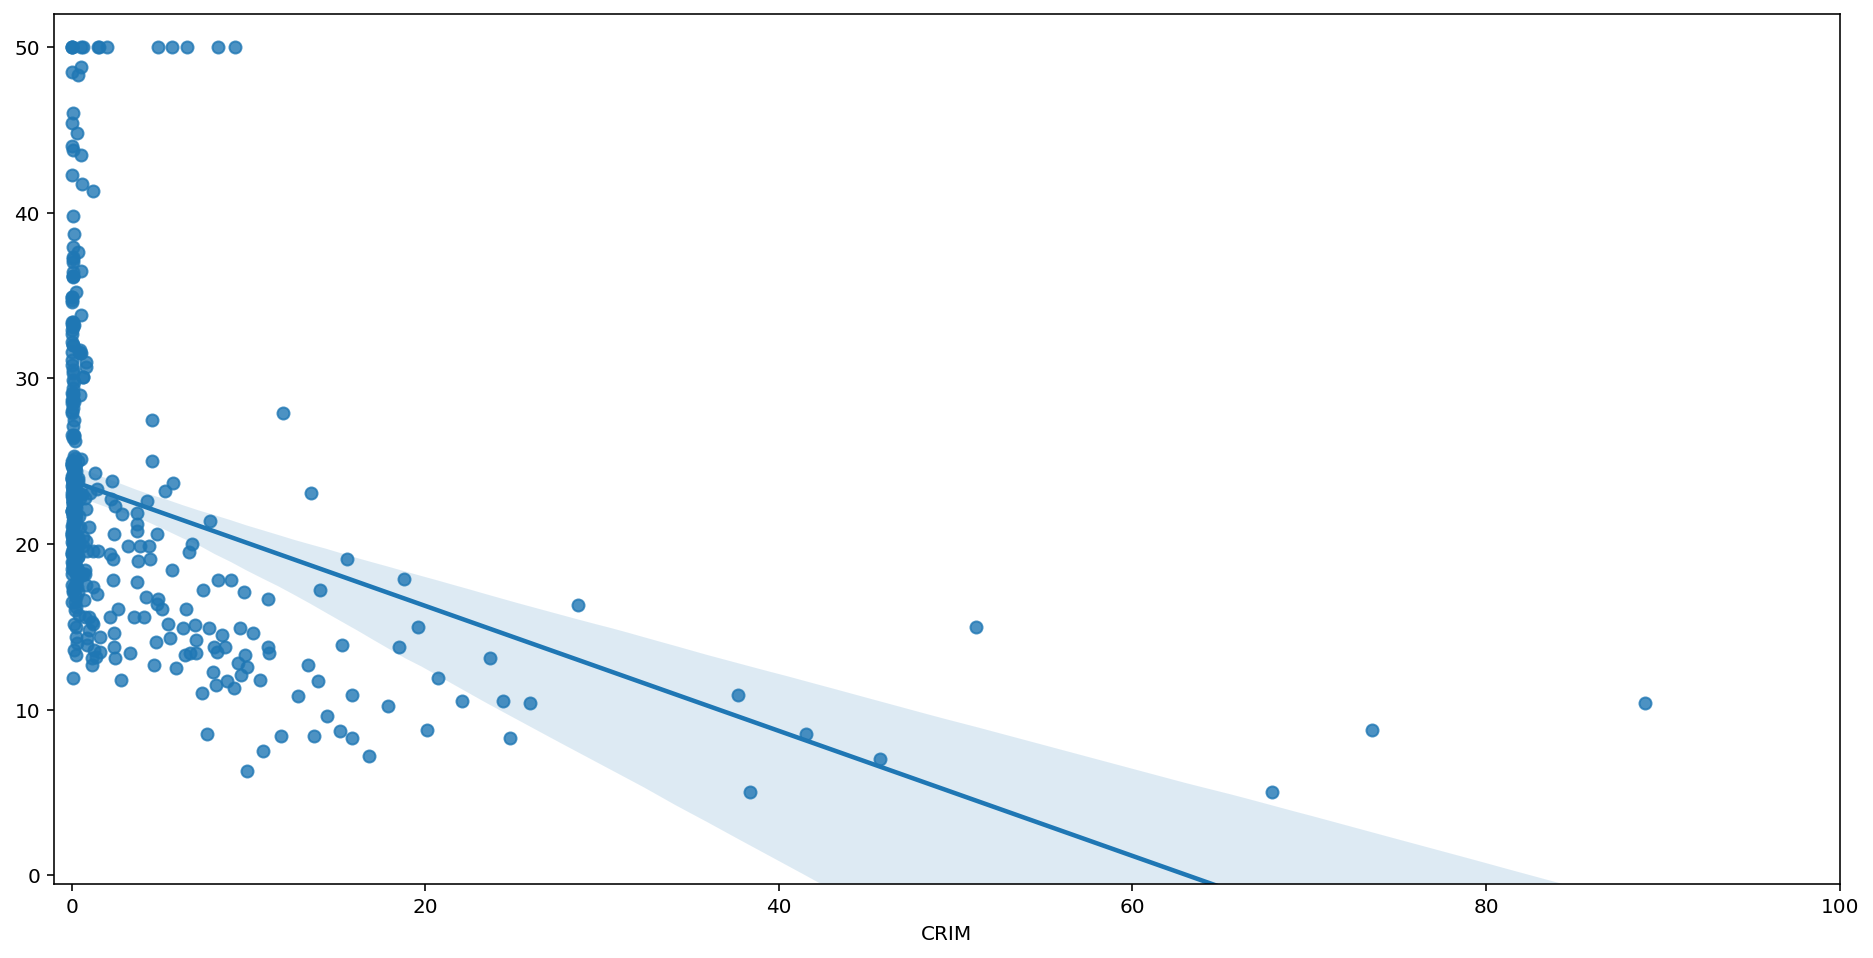

In [14]:
plt.figure(figsize=(16, 8))
plt.axis([-1, 100, -0.5, 52])
sns.regplot(train_df['CRIM'], y_train)
plt.show()

## 3.2.2 첫 인공신경망 만들기

In [15]:
inputs = Input(shape=(1,)) # one property(CRIM)
fc1 = Dense(10, activation='relu')(inputs)
fc2 = Dense(30, activation='relu')(fc1)
outputs = Dense(1)(fc2)

model = Model(inputs=inputs, outputs=outputs)

In [16]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_8 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 31        
Total params: 381
Trainable params: 381
Non-trainable params: 0
_________________________________________________________________


## 3.2.3 경사하강법과 역전파, 그리고 옵티마이져

In [17]:
model.compile(optimizer = 'RMSprop', loss = 'mean_squared_error')

## 3.2.4 학습과 시험

In [ ]:
history = model.fit(x_train_crime, y_train, epochs=30, batch_size=8)

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [1]:
def create_model(input_shape):
    # 모델을 여러번 구현해야할 때 함수 형식으로 만들어 놓으면 편함
    inputs = Input(shape=(input_shape,))
    fc1 = Dense(10, activation='relu')(inputs)
    fc2 = Dense(30, activation='relu')(fc1)
    outputs = Dense(1)(fc2)
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [5]:
model = create_model(1)
model.summary()
model.compile(optimizer='RMSprop',
             loss='mean_squared_error')

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_5 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 31        
Total params: 381
Trainable params: 381
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train_crim, y_train,
                   validation_data=(x_test_crim, y_test),
                   epochs = 30, batch_size = 8)

In [ ]:
plt.plot(history.history['loss'], '-')
plt.plot(history.history['val_loss'], '-.')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 3.2.5 상대적으로 높은 성능으로 집값 예측하기

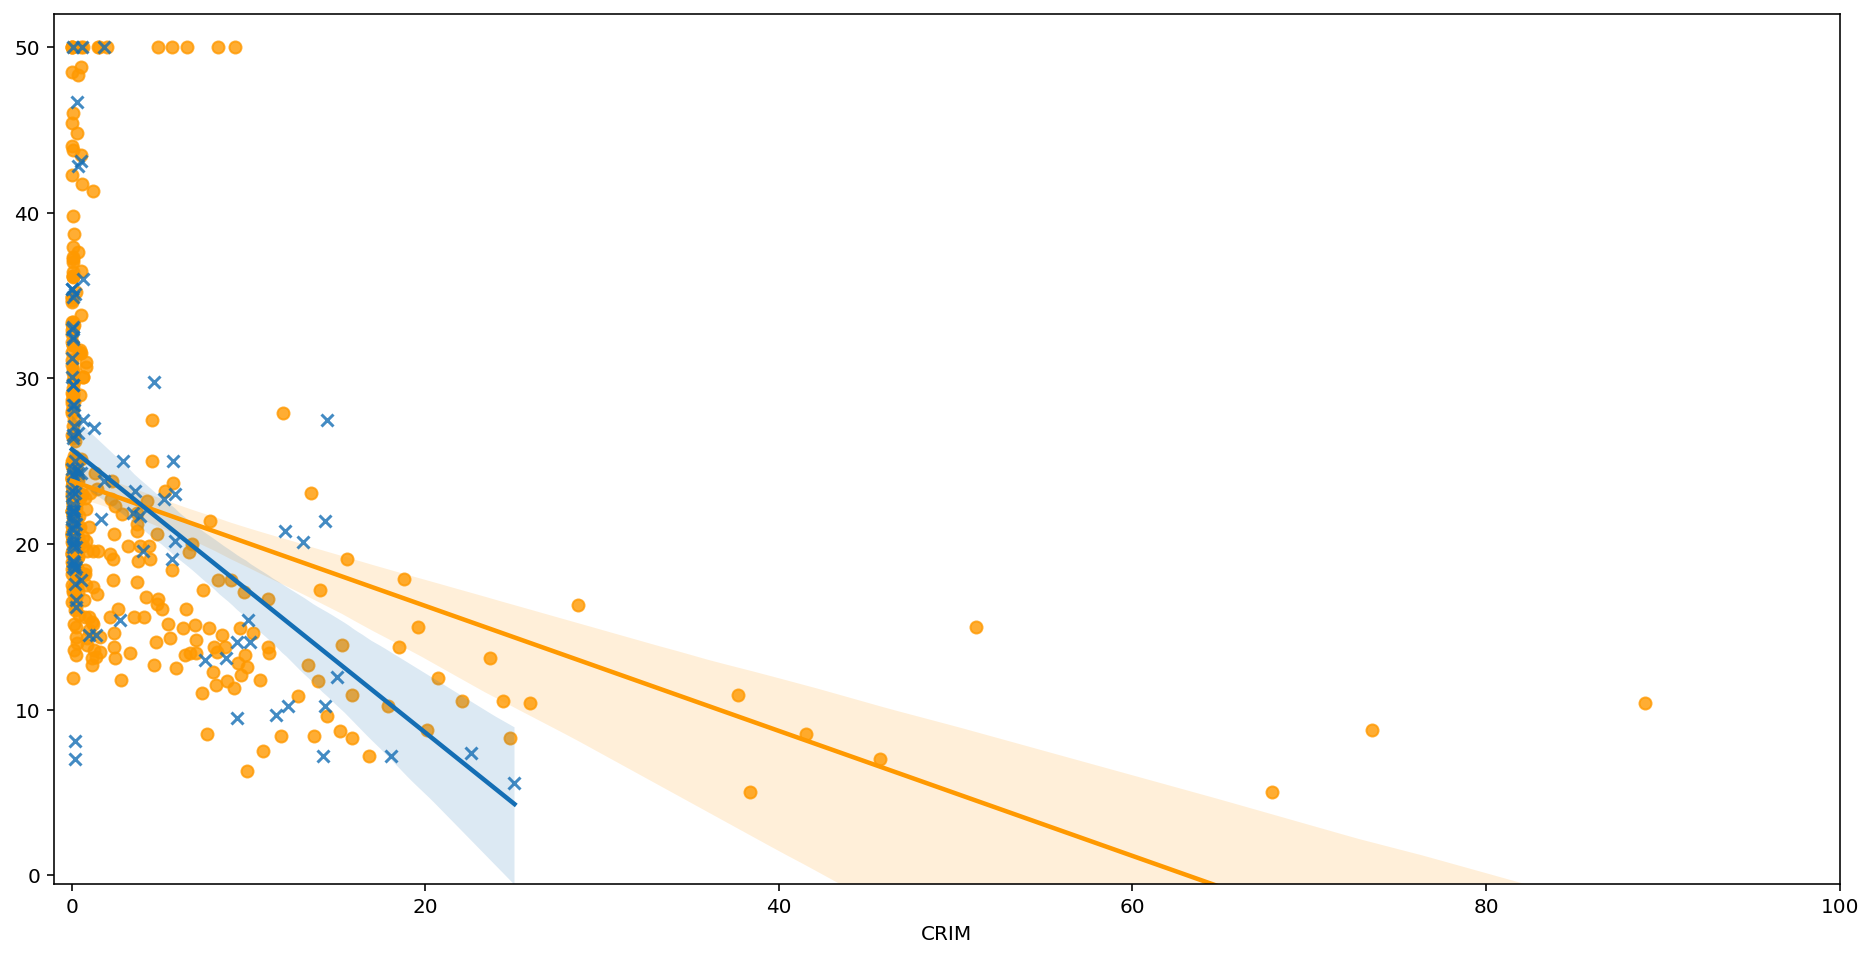

In [34]:
test_df = pd.DataFrame(data=x_test, columns=cols)

plt.figure(figsize=(16, 8))
plt.axis([-1,100, -0.5, 52])
sns.regplot(train_df['CRIM'], y_train, color='#ff9900', marker="o")
sns.regplot(test_df['CRIM'], y_test, color='#146EB4', marker="x")
plt.show()

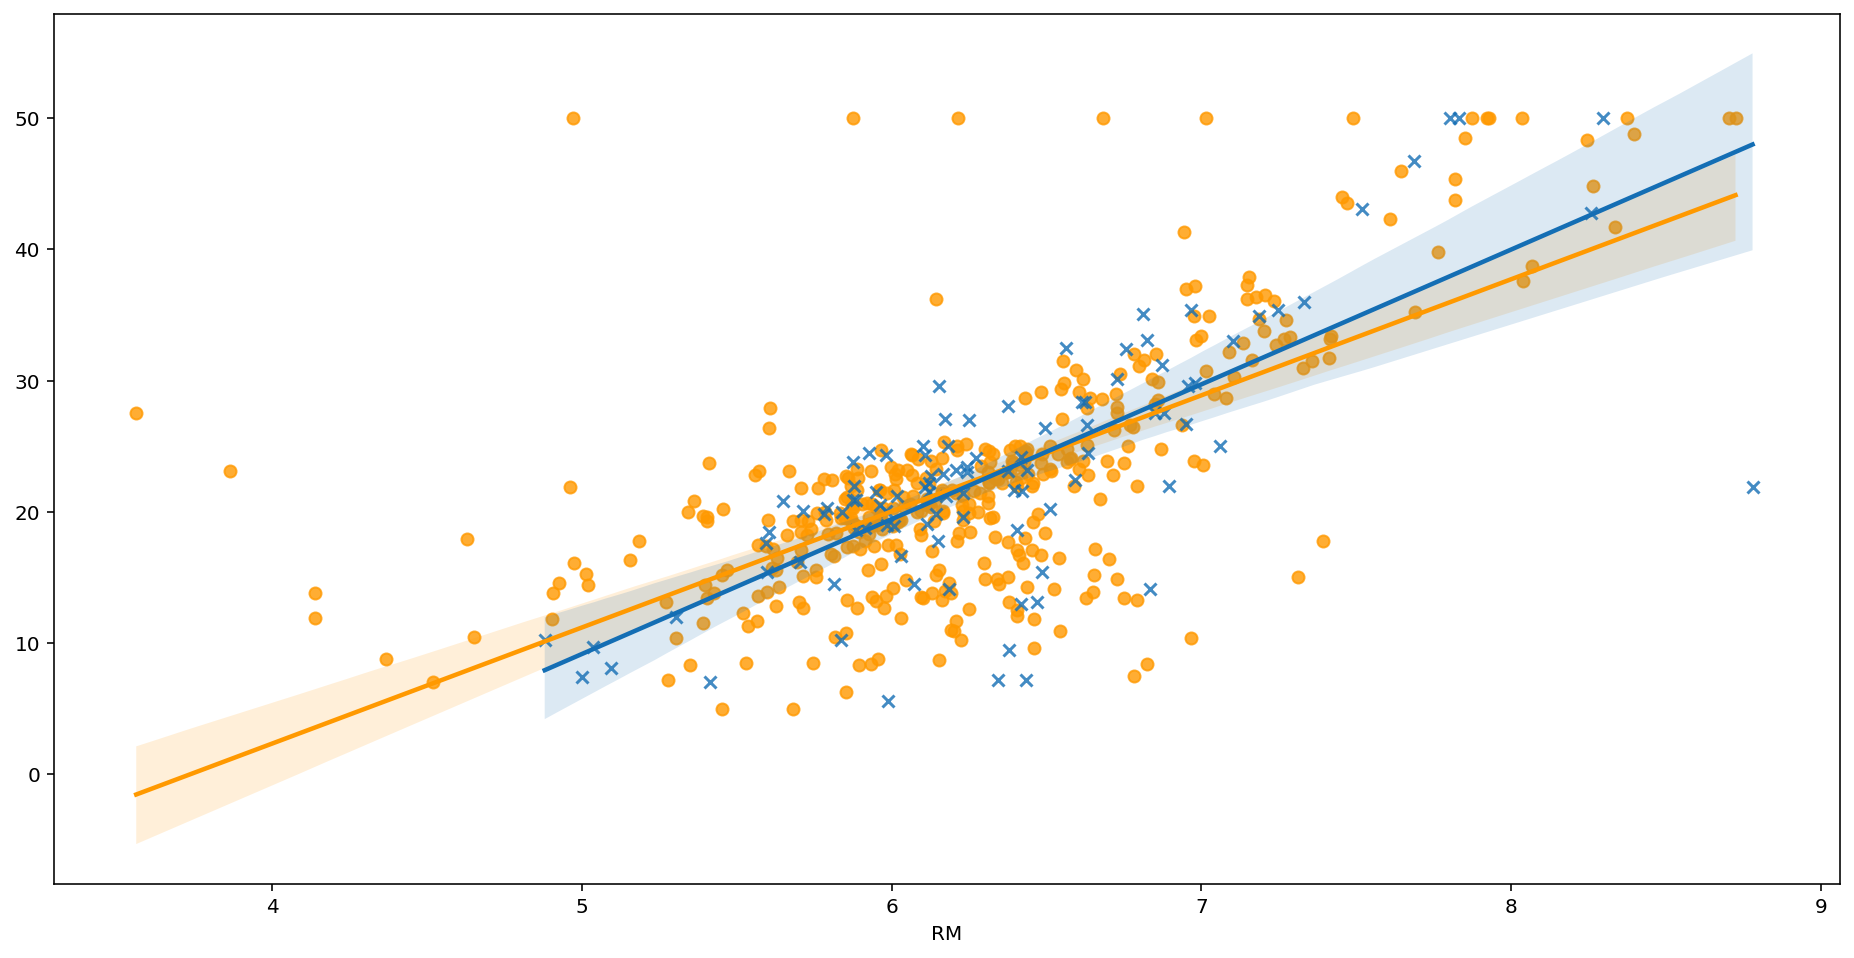

In [31]:
# 주거당 평균 방 수
plt.figure(figsize=(16, 8))
# plt.axis([3,9, -10, 52])
sns.regplot(train_df['RM'], y_train, color='#ff9900', marker="o")
sns.regplot(test_df['RM'], y_test, color='#146EB4', marker="x")
plt.show()

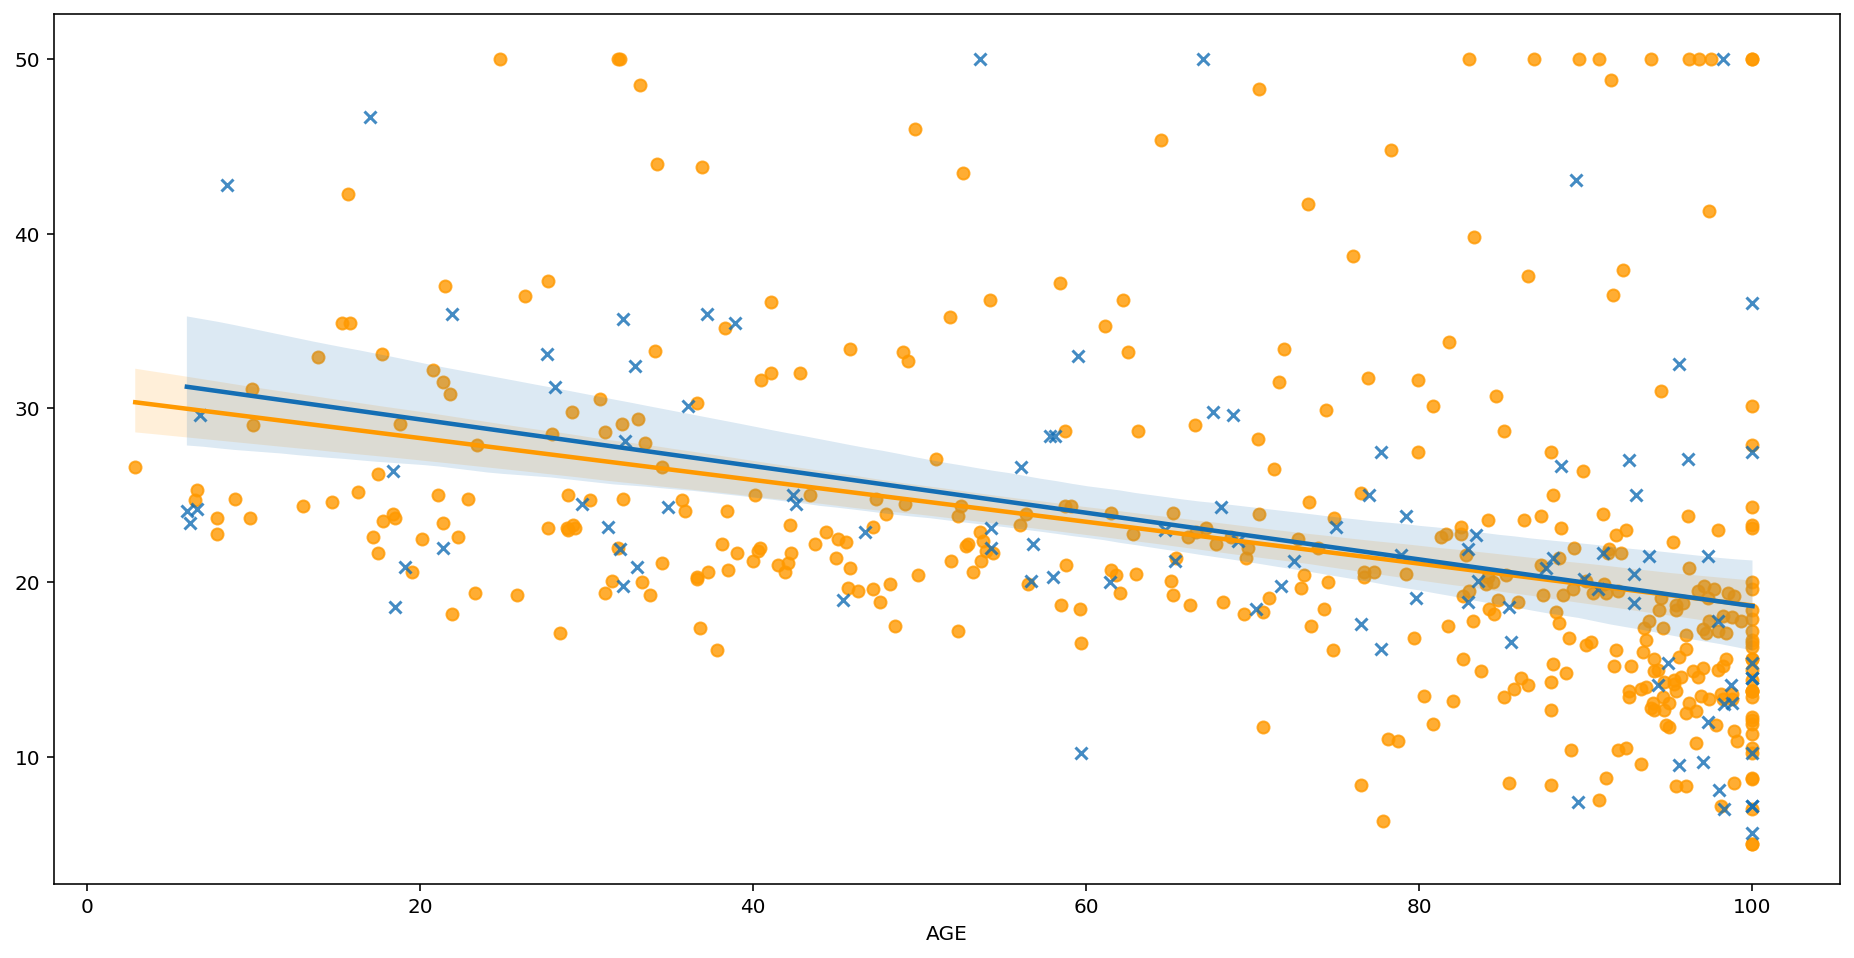

In [30]:
# 소유 주택의 비율
plt.figure(figsize=(16, 8))
# plt.axis([0,105, -10, 52])
sns.regplot(train_df['AGE'], y_train, color='#ff9900', marker="o")
sns.regplot(test_df['AGE'], y_test, color='#146EB4', marker="x")
plt.show()

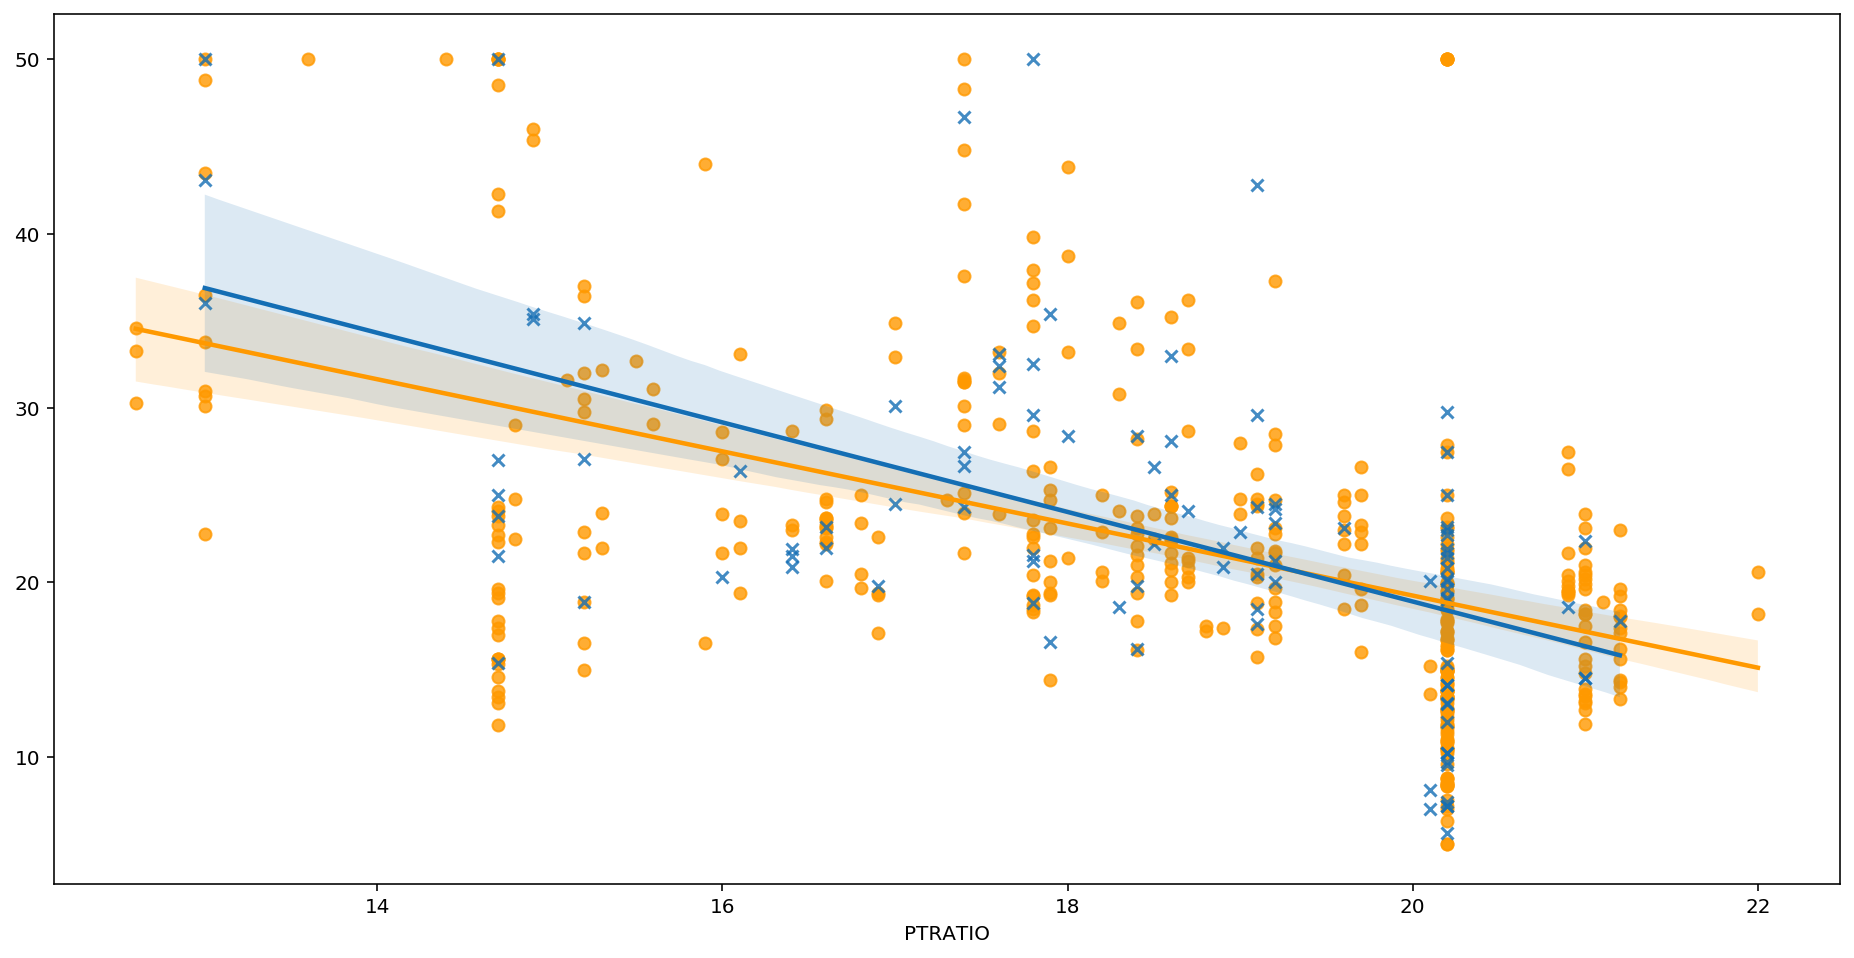

In [29]:
# 도시별 학생-교사 비율
plt.figure(figsize=(16, 8))
# plt.axis([12,23, -10, 52])
sns.regplot(train_df['PTRATIO'], y_train, color='#ff9900', marker="o")
sns.regplot(test_df['PTRATIO'], y_test, color='#146EB4', marker="x")
plt.show()

In [35]:
x_train_four = train_df[['CRIM', 'RM', 'AGE', 'PTRATIO']].values
x_test_four = test_df[['CRIM', 'RM', 'AGE', 'PTRATIO']].values

In [36]:
model = create_model(4)
model.summary()
model.compile(optimizer = 'RMSprop', loss='mean_squared_error')

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_8 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 31        
Total params: 411
Trainable params: 411
Non-trainable params: 0
_________________________________________________________________


In [37]:
history = model.fit(x_train_four, y_train,
                   validation_data=(x_test_four, y_test),
                   epochs=30, batch_size=8)

Train on 404 samples, validate on 102 samples
Epoch 1/30
404/404 [==============================] - 0s 568us/step - loss: 181.9487 - val_loss: 171.2947
Epoch 2/30
404/404 [==============================] - 0s 163us/step - loss: 140.5529 - val_loss: 142.8444
Epoch 3/30
404/404 [==============================] - 0s 175us/step - loss: 120.9170 - val_loss: 115.7777
Epoch 4/30
404/404 [==============================] - 0s 173us/step - loss: 104.5092 - val_loss: 98.8448
Epoch 5/30
404/404 [==============================] - 0s 170us/step - loss: 95.5177 - val_loss: 92.8586
Epoch 6/30
404/404 [==============================] - 0s 171us/step - loss: 87.8916 - val_loss: 94.2181
Epoch 7/30
404/404 [==============================] - 0s 175us/step - loss: 85.1316 - val_loss: 79.7863
Epoch 8/30
404/404 [==============================] - 0s 200us/step - loss: 82.2749 - val_loss: 76.5256
Epoch 9/30
404/404 [==============================] - 0s 190us/step - loss: 80.5082 - val_loss: 72.5841
Epoch 10/30

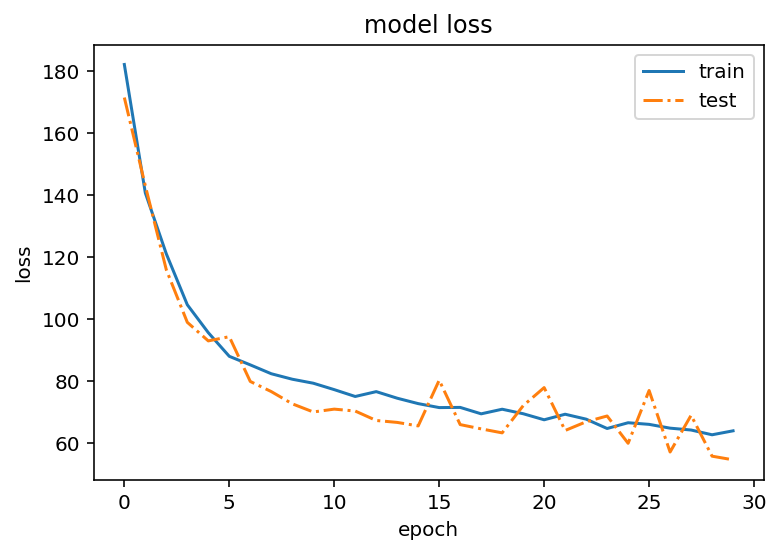

In [39]:
plt.plot(history.history['loss'], '-')
plt.plot(history.history['val_loss'], '-.')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## 3.2.6 나만의 데이터셋을 만들어 집값 예측하기

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm

# conda(or pip) install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras import regularizers
from keras import metrics

#from google.colab import drive
#drive.mount('/content/drive')
#!ls "/content/drive/My Drive/colab/dataset/"
#그냥 local로 

df_ks_cn = pd.read_csv("../dataset/house/경상남도_창녕군_개별주택가격정보_20190806.csv", encoding = "euc-kr")
df_dj_dg = pd.read_csv("../dataset/house/대전광역시_동구_개별주택가격정보_20190719.csv", encoding = "euc-kr")
df_jr_wj = pd.read_csv("../dataset/house/전라북도_완주군_개별주택가격정보_20191010.csv", encoding = "euc-kr")
df_jr_jj = pd.read_csv("../dataset/house/전라북도_전주시_개별주택가격정보_20190508.csv", encoding = "euc-kr")
df_cc_cj = pd.read_csv("../dataset/house/충청북도_충주시_개별주택가격정보_20190501.csv", encoding = "euc-kr")


In [57]:
df_ks_cn.columns

Index(['고유번호', '법정동코드', '법정동명', '특수지구분코드', '특수지구분명', '지번', '건축물대장고유번호', '기준년도',
       '기준월', '동코드', '동명', '토지대장면적', '산정대지면적', '건물전체연면적', '건물산정연면적', '주택가격',
       '표준지여부', '데이터기준일자'],
      dtype='object')

In [64]:
df_tmp = []
df_tmp_y = []
for idx, df in enumerate([df_ks_cn, df_dj_dg, df_jr_wj, df_jr_jj, df_cc_cj]):
    #print(df)
    df_tmp.append(df.loc[:,['법정동코드', '법정동명', '지번', '특수지구분명', '토지대장면적', '산정대지면적', 
                            '건물전체연면적', '건물산정연면적', '표준지여부', '주택가격']])
    # https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'
    
df_train = pd.concat([df_tmp[0], df_tmp[1], df_tmp[2], df_tmp[3], df_tmp[4]])
df_train.head()

,법정동코드,법정동명,지번,특수지구분명,토지대장면적,산정대지면적,건물전체연면적,건물산정연면적,표준지여부,주택가격
0,4874025021,경상남도 창녕군 창녕읍 송현리,45-8,일반,610.0,610.0,93.15,93.15,N,97000000
1,4874025021,경상남도 창녕군 창녕읍 송현리,62-2,일반,270.0,270.0,51.57,51.57,N,51000000
2,4874025021,경상남도 창녕군 창녕읍 송현리,62-3,일반,476.0,376.0,81.58,81.58,N,88200000
3,4874025021,경상남도 창녕군 창녕읍 송현리,64-3,일반,415.0,415.0,135.85,135.85,N,110000000
4,4874025021,경상남도 창녕군 창녕읍 송현리,66-1,일반,533.0,47.0,28.76,28.76,N,6020000


## 3.2.7 데이터셋 전처리

In [65]:
df_train.columns = ['legal_code', 'legal_name', 'dist_num', 'is_special',
                   'land_area', 'counting_area', 'total_area', 'building_area',
                   'is_standard', 'price']
df_train.head()

,legal_code,legal_name,dist_num,is_special,land_area,counting_area,total_area,building_area,is_standard,price
0,4874025021,경상남도 창녕군 창녕읍 송현리,45-8,일반,610.0,610.0,93.15,93.15,N,97000000
1,4874025021,경상남도 창녕군 창녕읍 송현리,62-2,일반,270.0,270.0,51.57,51.57,N,51000000
2,4874025021,경상남도 창녕군 창녕읍 송현리,62-3,일반,476.0,376.0,81.58,81.58,N,88200000
3,4874025021,경상남도 창녕군 창녕읍 송현리,64-3,일반,415.0,415.0,135.85,135.85,N,110000000
4,4874025021,경상남도 창녕군 창녕읍 송현리,66-1,일반,533.0,47.0,28.76,28.76,N,6020000


In [66]:
df_train[df_train['price']== 0]['price'].value_counts()

0    1258
Name: price, dtype: int64

In [67]:
df_train = df_train.loc[(df_train['price']!=0)]
print(df_train.shape)

(134799, 10)


In [69]:
df_train['dist_num_0'] = df_train['dist_num'].str.split('-').str.get(0)
df_train['dist_num_1'] = df_train['dist_num'].str.split('-').str.get(1)
df_train = df_train.drop(['dist_num'], axis=1)
df_train.head()

,legal_code,legal_name,is_special,land_area,counting_area,total_area,building_area,is_standard,price,dist_num_0,dist_num_1
0,4874025021,경상남도 창녕군 창녕읍 송현리,일반,610.0,610.0,93.15,93.15,N,97000000,45,8
1,4874025021,경상남도 창녕군 창녕읍 송현리,일반,270.0,270.0,51.57,51.57,N,51000000,62,2
2,4874025021,경상남도 창녕군 창녕읍 송현리,일반,476.0,376.0,81.58,81.58,N,88200000,62,3
3,4874025021,경상남도 창녕군 창녕읍 송현리,일반,415.0,415.0,135.85,135.85,N,110000000,64,3
4,4874025021,경상남도 창녕군 창녕읍 송현리,일반,533.0,47.0,28.76,28.76,N,6020000,66,1


In [70]:
df_train[df_train['dist_num_0'] == '0']
df_train[df_train['dist_num_1'] == '0']

,legal_code,legal_name,is_special,land_area,counting_area,total_area,building_area,is_standard,price,dist_num_0,dist_num_1


In [71]:
df_train['dist_num_0'].isna().value_counts()

False    89490
True     45309
Name: dist_num_0, dtype: int64

In [72]:
df_train['dist_num_1'].isna().value_counts()

False    69777
True     65022
Name: dist_num_1, dtype: int64

In [75]:
df_train['dist_num_0'] = df_train['dist_num_0'].fillna('0')
df_train['dist_num_1'] = df_train['dist_num_1'].fillna('0')
df_train['dist_num_0'].isna().value_counts()

False    134799
Name: dist_num_0, dtype: int64

In [74]:
df_train['dist_num_1'].isna().value_counts()

False    134799
Name: dist_num_1, dtype: int64

In [76]:
df_train['dist_num_0'] = df_train['dist_num_0'].astype(int)
df_train['dist_num_1'] = df_train['dist_num_1'].astype(int)